In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
PID = 42
smartphone = "N5X"
extension = 0

acc = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-acc-" + smartphone + "-" + str(extension) + ".csv", ";")
gyro = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-gyro-" + smartphone + "-" + str(extension) + ".csv", ";")
ori = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-ori-" + smartphone + "-" + str(extension) + ".csv", ";")
points = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-points-" + smartphone + "-" + str(extension) + ".csv", ";")
fitts = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-fitts-" + smartphone + "-" + str(extension) + ".csv", ";")
rot = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-rot-" + smartphone + "-" + str(extension) + ".csv", ";")
grav = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-grav-" + smartphone + "-" + str(extension) + ".csv", ";")
mag = pd.read_csv(str(Path.home()) + "/data/fapra_imu-" +  str(PID) + "-mag-" + smartphone + "-" + str(extension) + ".csv", ";")

In [3]:
len(points)

288

In [4]:
dur = (acc.time.tolist()[-1] - acc.time[0]) / 60000
print(str(dur) + " min")

9.575083333333334 min


# Acc

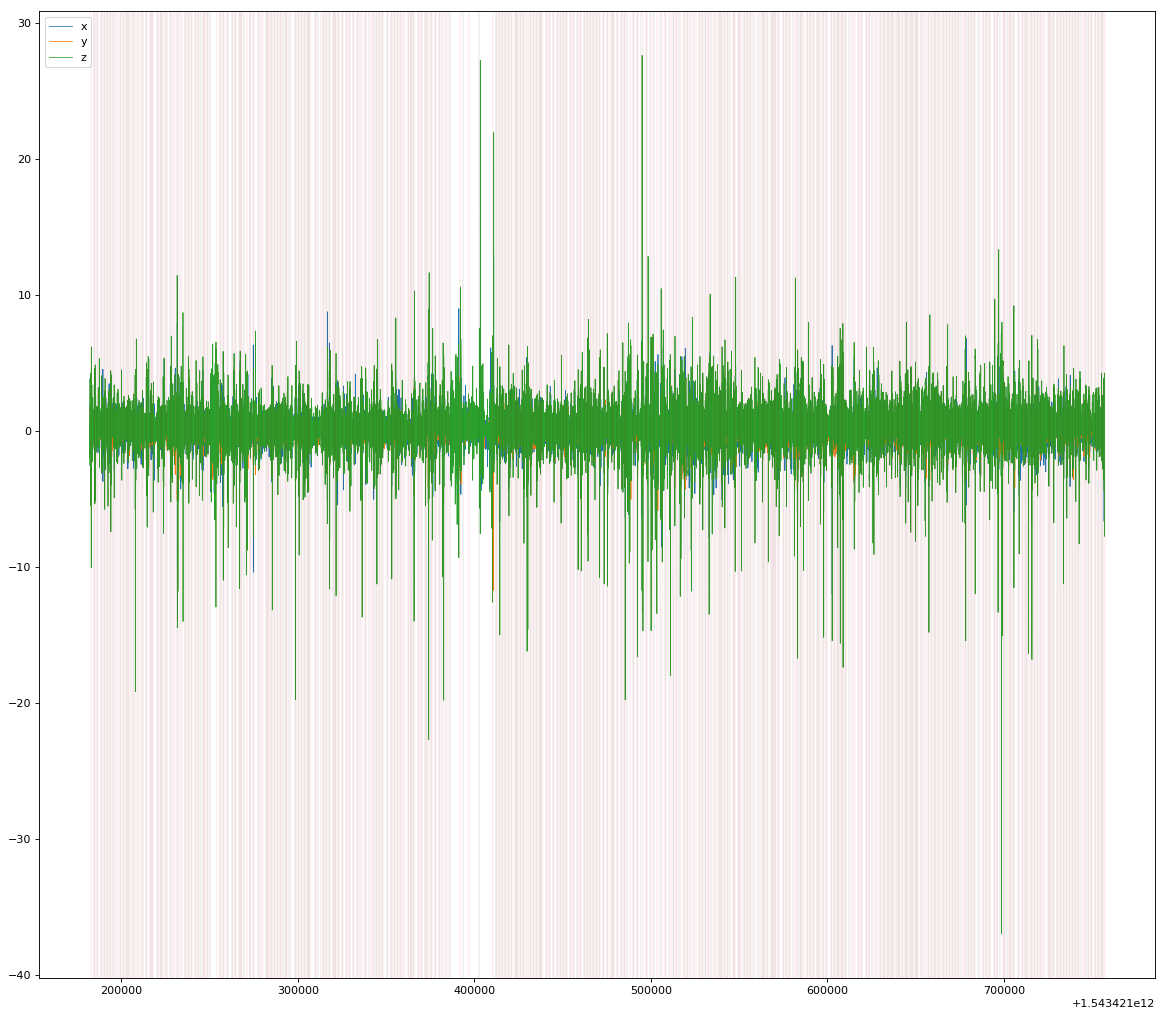

In [5]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(acc.time, acc.x, label='x',linewidth=0.7)
plt.plot(acc.time, acc.y, label='y',linewidth=0.7)
plt.plot(acc.time, acc.z, label='z',linewidth=0.7)
plt.legend()
for xc in fitts.time:
    plt.axvline(x=xc, linewidth=0.1, c="black")
for xc in points.time:
    plt.axvline(x=xc, linewidth=0.1, c="red")

# Gyro

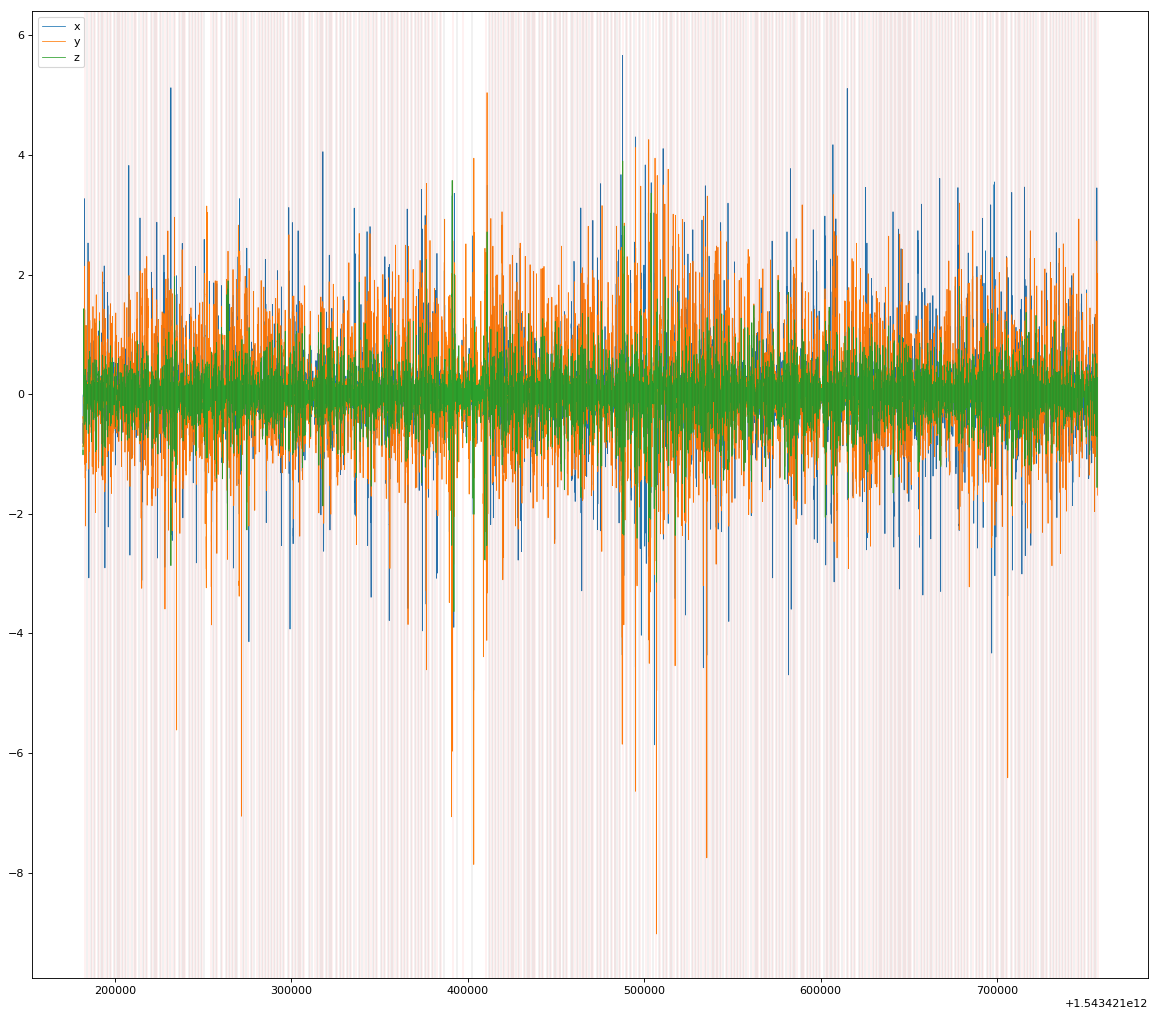

In [6]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(gyro.time, gyro.x, label='x',linewidth=0.7)
plt.plot(gyro.time, gyro.y, label='y',linewidth=0.7)
plt.plot(gyro.time, gyro.z, label='z',linewidth=0.7)
plt.legend()
for xc in fitts.time:
    plt.axvline(x=xc, linewidth=0.1, c="black")
for xc in points.time:
    plt.axvline(x=xc, linewidth=0.1, c="red")

# Orientation

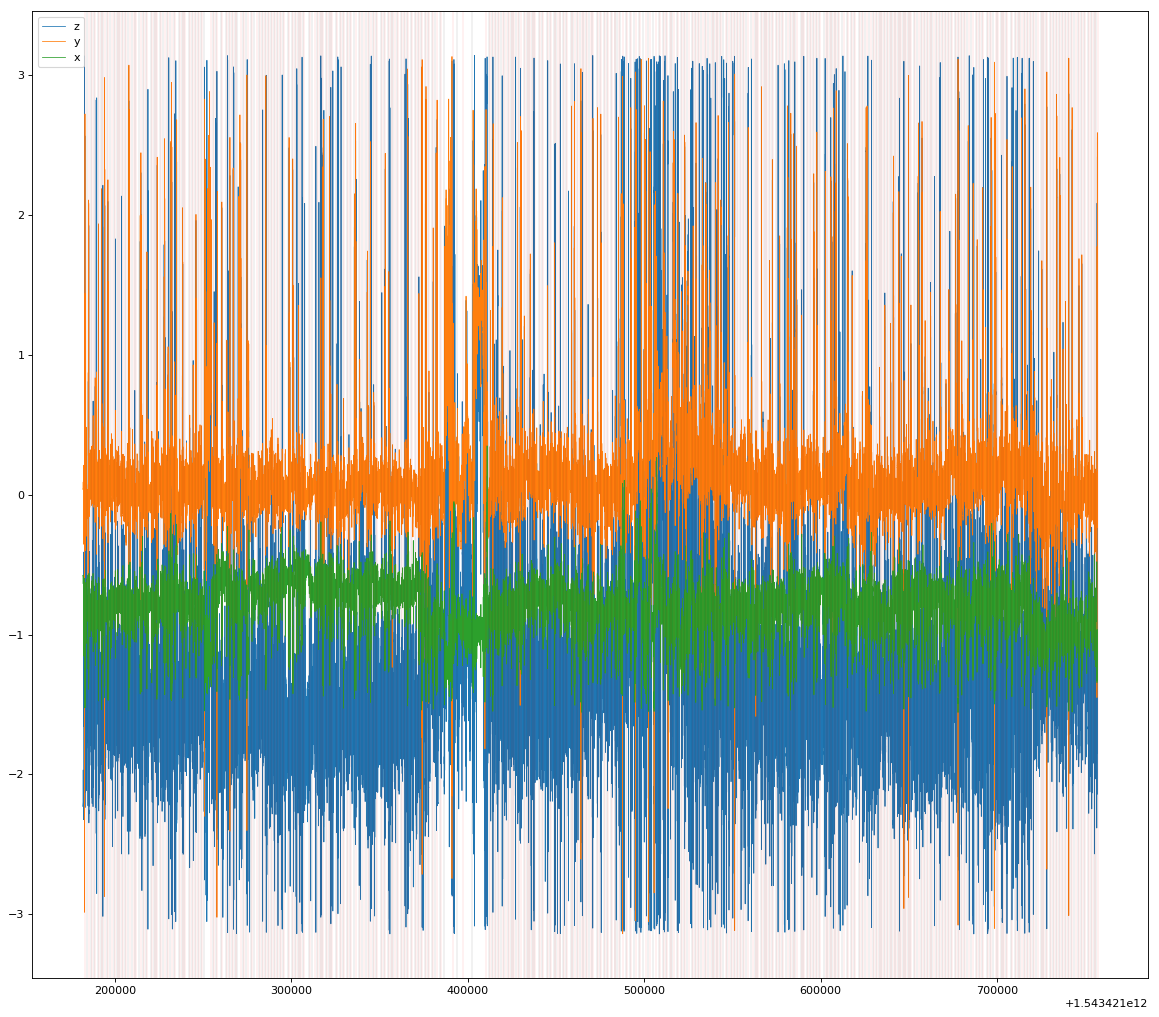

In [7]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(ori.time, ori.z, label='z',linewidth=0.7)
plt.plot(ori.time, ori.y, label='y',linewidth=0.7)
plt.plot(ori.time, ori.x, label='x',linewidth=0.7)
plt.legend()
for xc in fitts.time:
    plt.axvline(x=xc, linewidth=0.1, c="black")
for xc in points.time:
    plt.axvline(x=xc, linewidth=0.1, c="red")

# Rotation

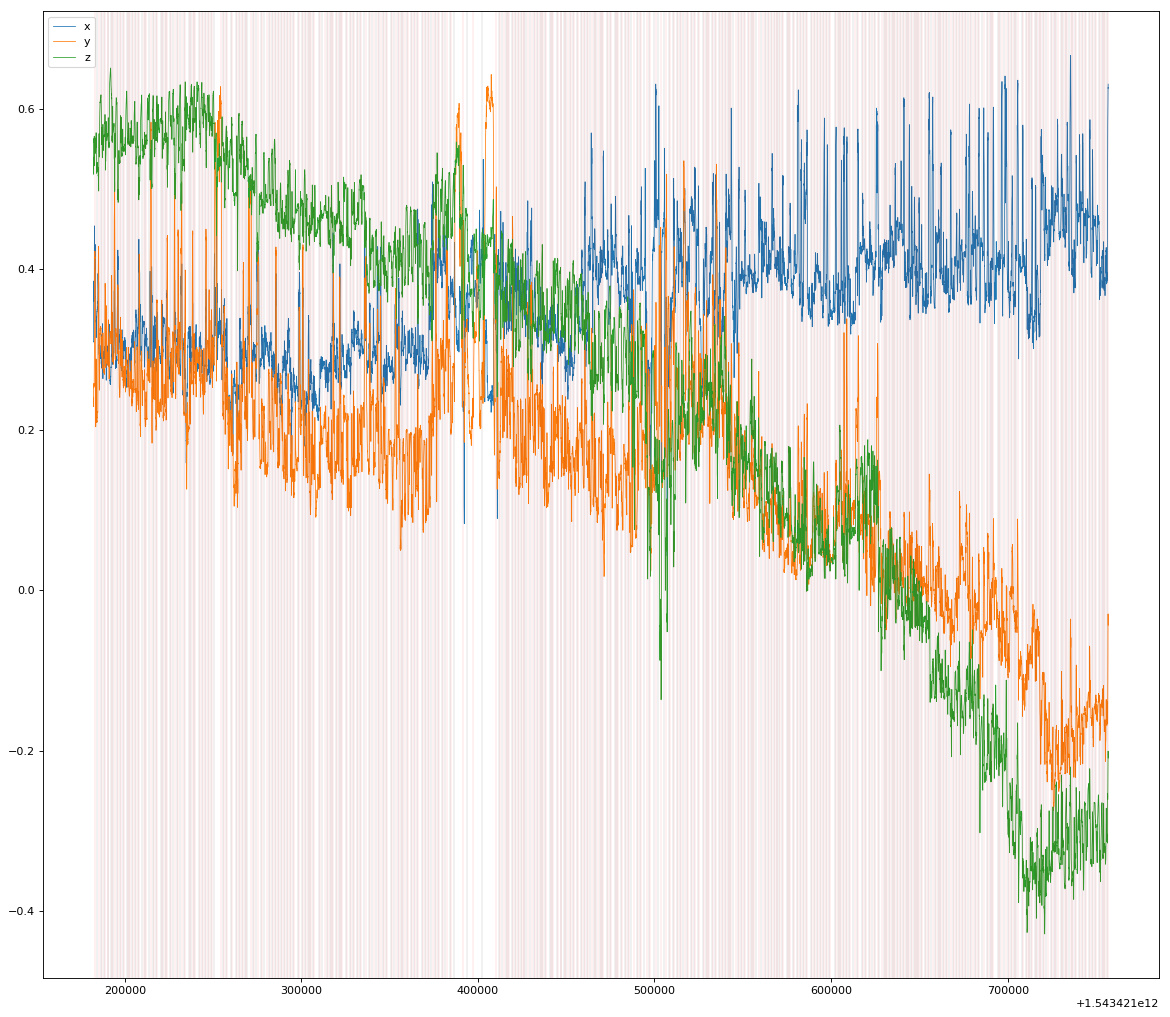

In [8]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(rot.time, rot.x, label='x',linewidth=0.7)
plt.plot(rot.time, rot.y, label='y',linewidth=0.7)
plt.plot(rot.time, rot.z, label='z',linewidth=0.7)
plt.legend()
for xc in fitts.time:
    plt.axvline(x=xc, linewidth=0.1, c="black")
for xc in points.time:
    plt.axvline(x=xc, linewidth=0.1, c="red")

# Gravity

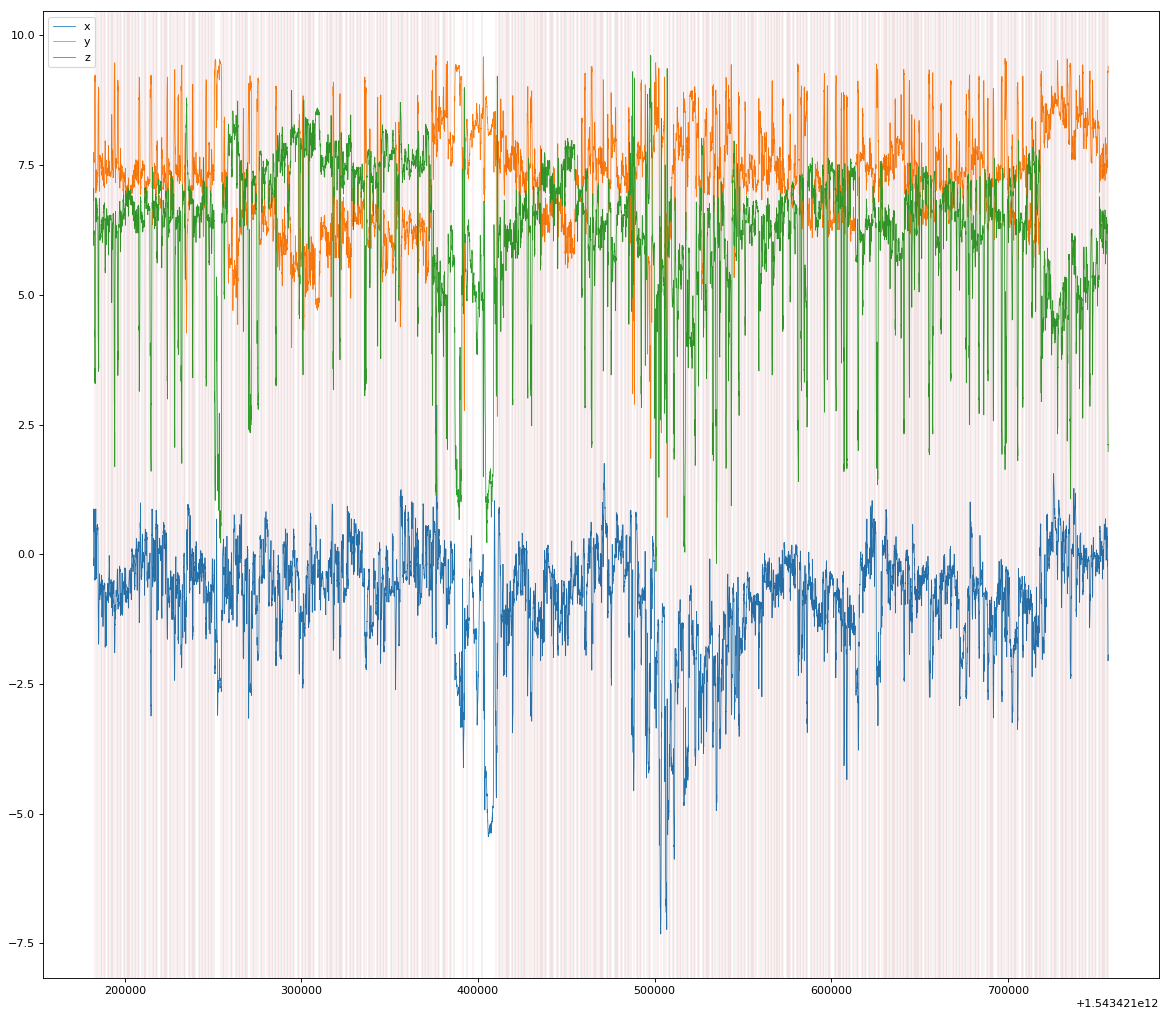

In [9]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(grav.time, grav.x, label='x',linewidth=0.7)
plt.plot(grav.time, grav.y, label='y',linewidth=0.7)
plt.plot(grav.time, grav.z, label='z',linewidth=0.7)
plt.legend()
for xc in fitts.time:
    plt.axvline(x=xc, linewidth=0.1, c="black")
for xc in points.time:
    plt.axvline(x=xc, linewidth=0.1, c="red")

# Magnetometer

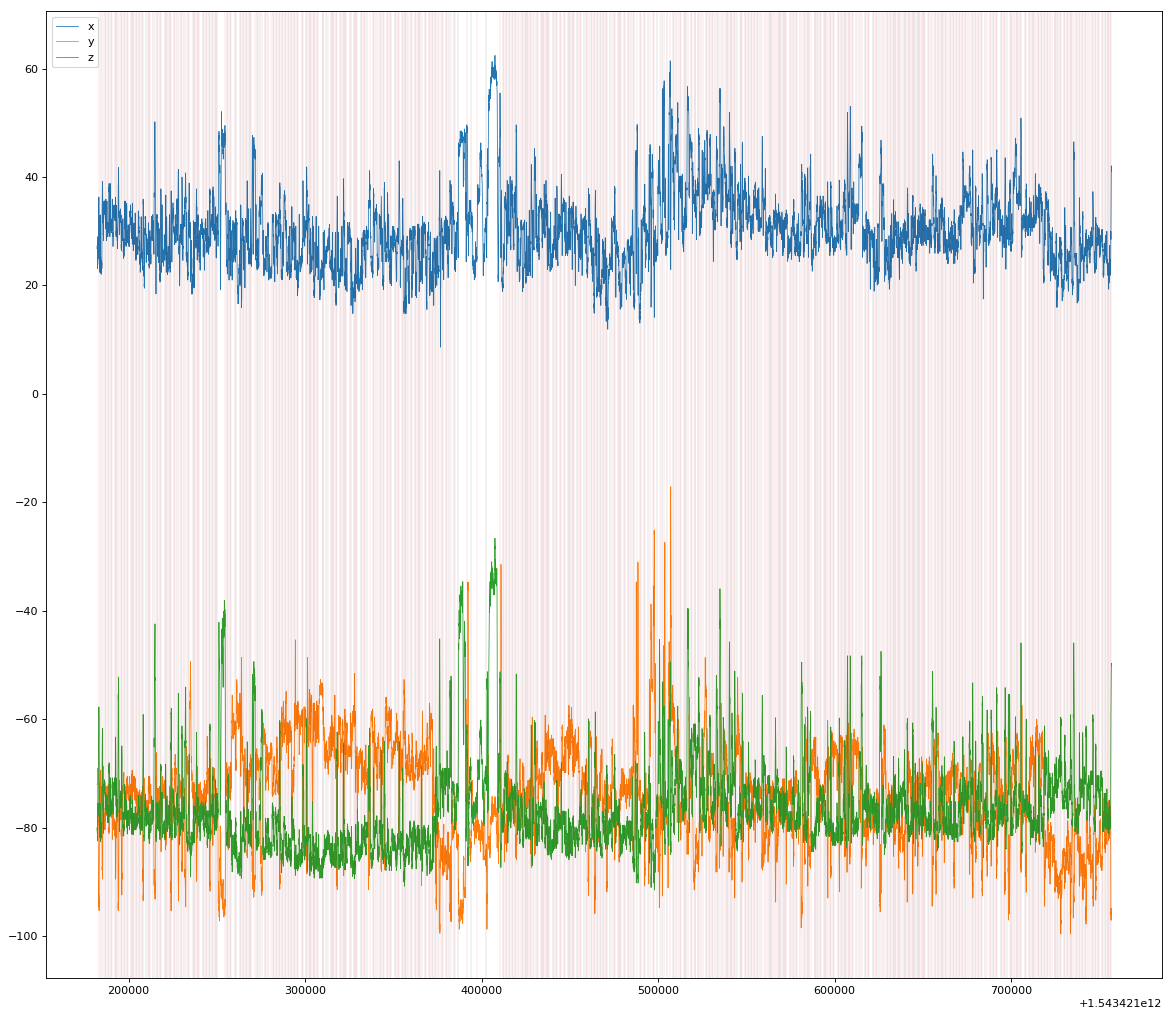

In [10]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(mag.time, mag.x, label='x',linewidth=0.7)
plt.plot(mag.time, mag.y, label='y',linewidth=0.7)
plt.plot(mag.time, mag.z, label='z',linewidth=0.7)
plt.legend()
for xc in fitts.time:
    plt.axvline(x=xc, linewidth=0.1, c="black")
for xc in points.time:
    plt.axvline(x=xc, linewidth=0.1, c="red")

# Points

In [11]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

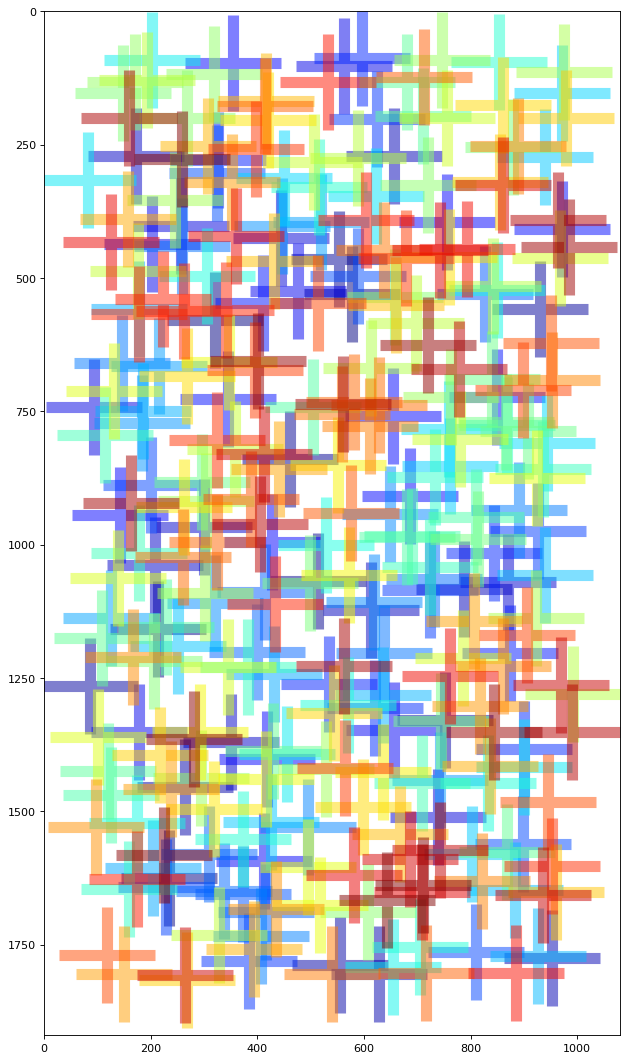

In [12]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.axis([0, 1080, 0, 1920])
plt.gca().invert_yaxis()
adjustFigAspect(fig,aspect=(9/16))
colors = plt.cm.jet(np.linspace(0,1,len(points["x-circle"])))

for i, (x, y) in enumerate(zip(points["x-circle"], points["y-circle"])):
    plt.plot(x, y, '+', mew=10, ms=173/2, alpha=0.5, color=colors[i])
plt.savefig(str(Path.home()) + '/data/points.png')